22MIA1076 - Yuvan Shankar Babu


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

dataset = pd.read_csv('/content/Student_Final.csv')
dataset.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [ ]:
print(dataset.dtypes)
print(dataset.isnull().any())

Hours Studied                       int64
Previous Scores                     int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
Performance Index                   int64
dtype: object
Hours Studied                       False
Previous Scores                     False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


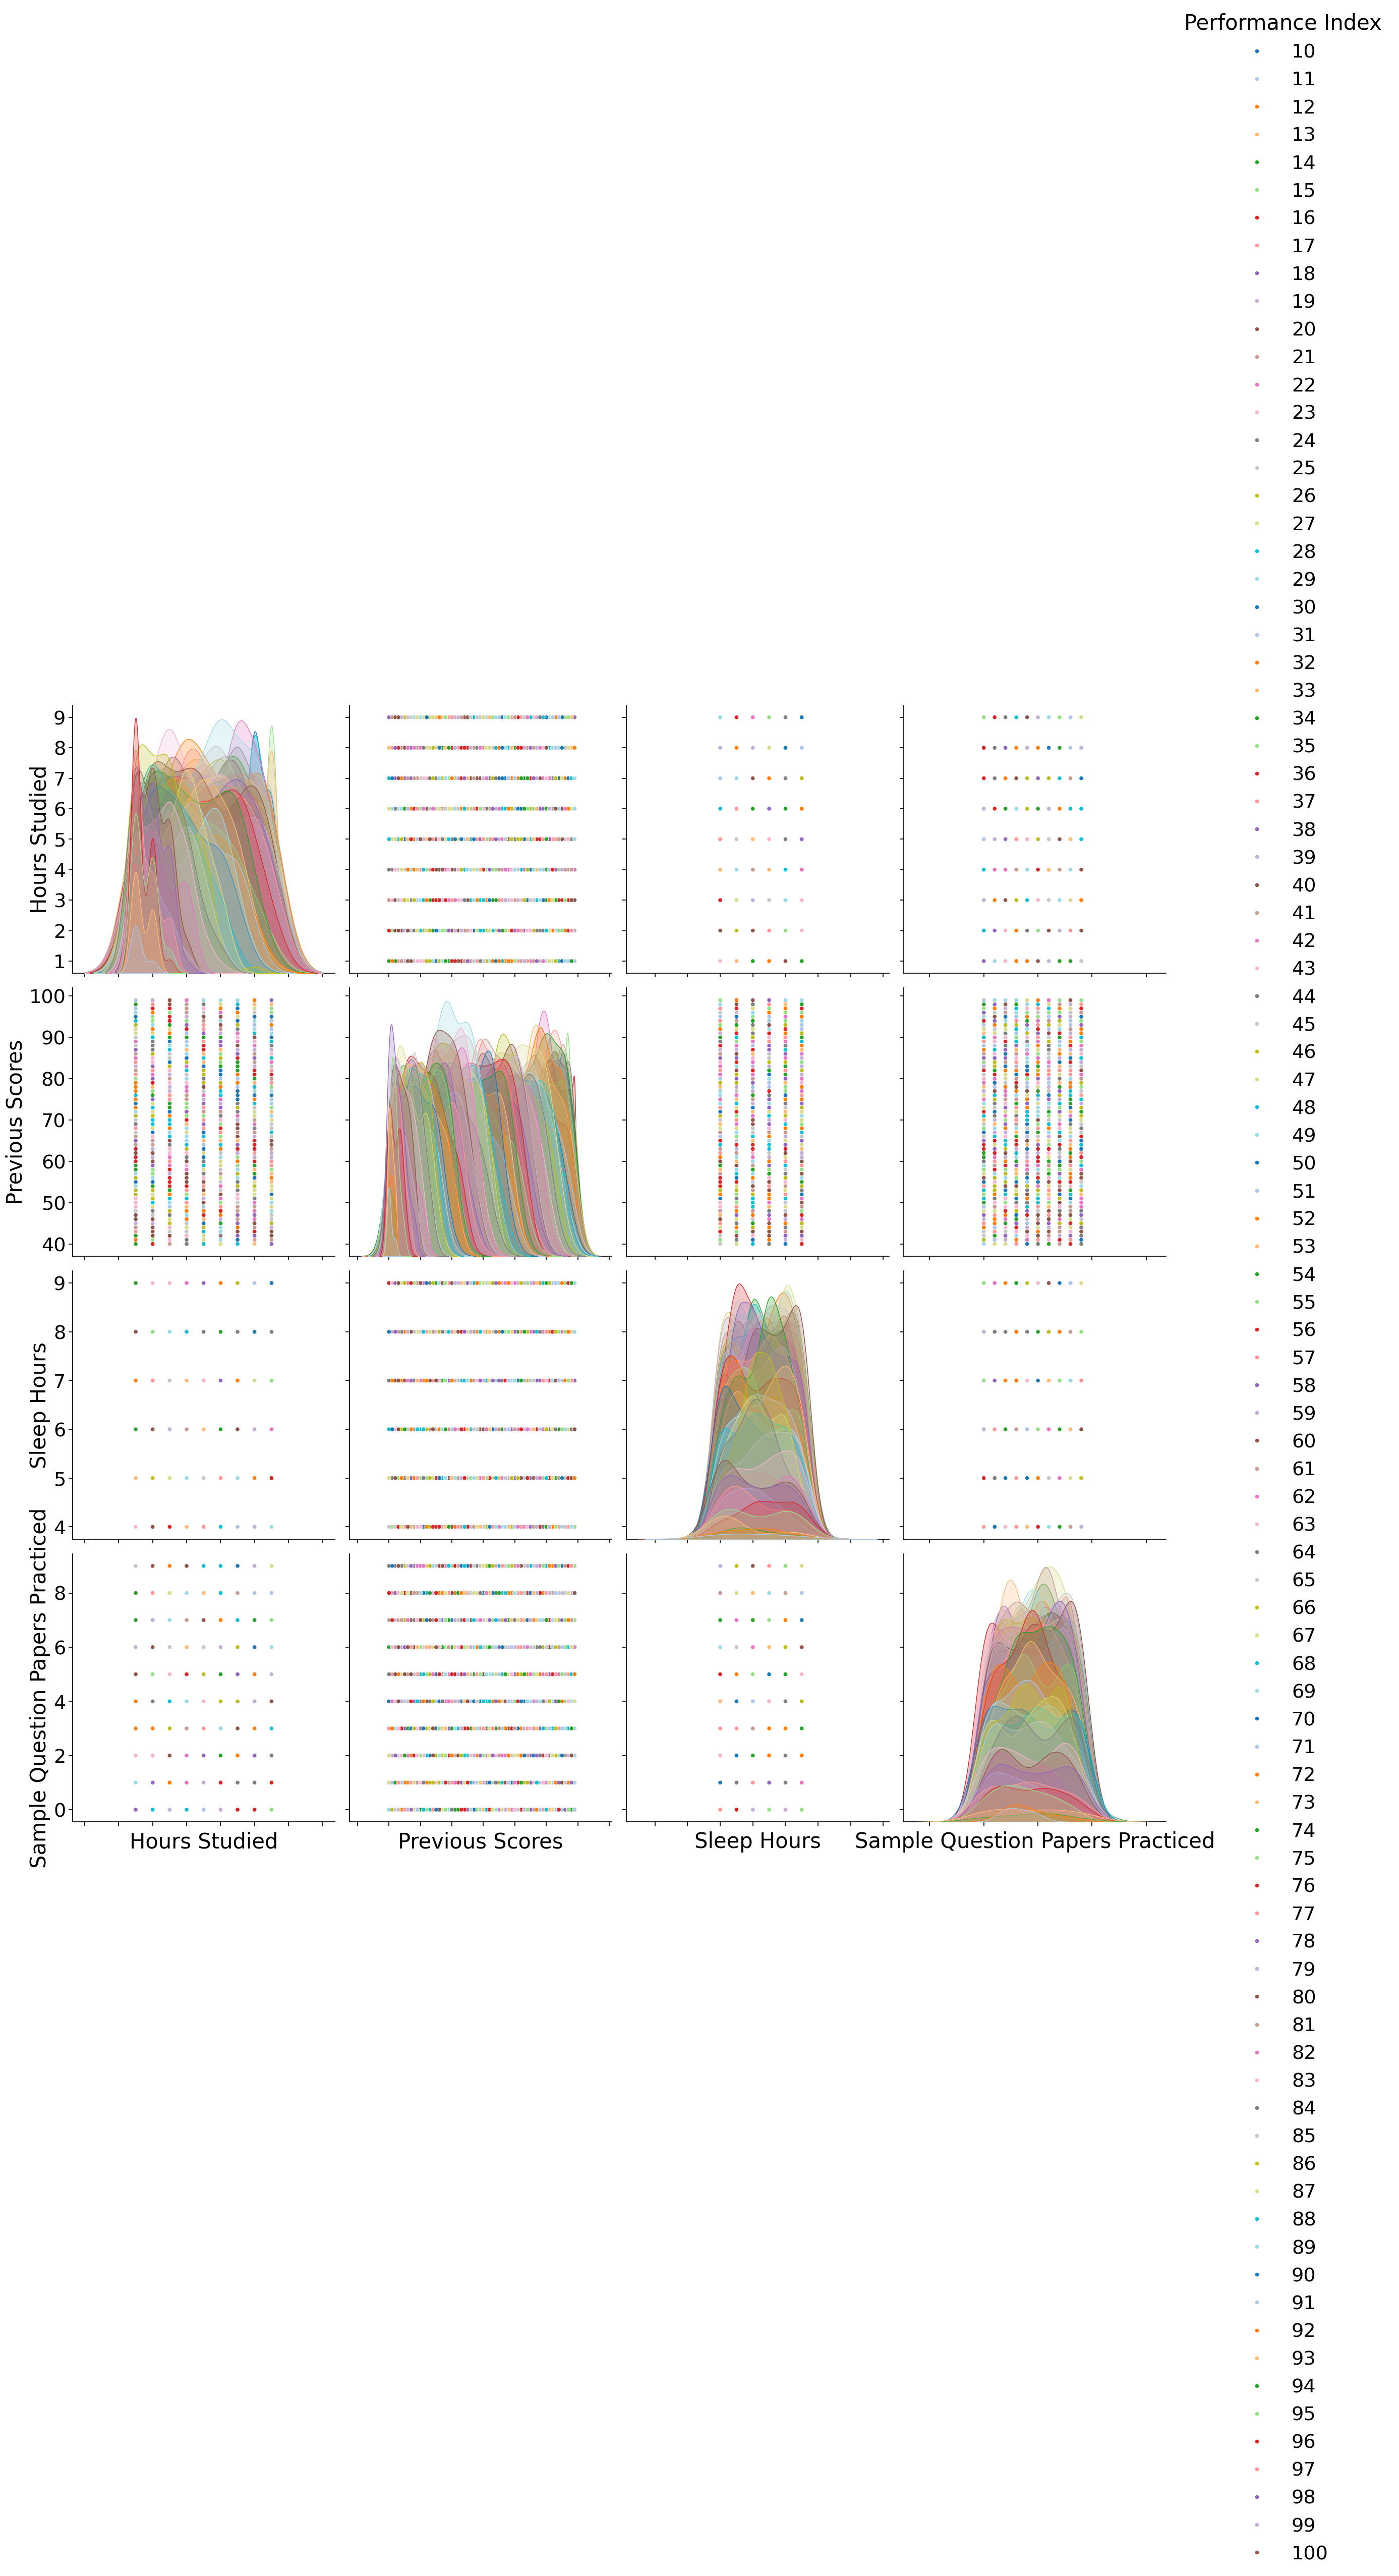

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

dataset = pd.read_csv('/content/Student_Final.csv')
dataset.head()
print(dataset.dtypes)
print(dataset.isnull().any())

with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']],
                     hue='Performance Index', palette='tab20', size=6)
g.set(xticklabels=[])


Separating independent and dependent variables:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('/content/Student_Final.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)


[50.76413596 53.40822561 78.59712726 ... 80.50376466 58.93338445
 51.35648067]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)


[50.76413596 53.40822561 78.59712726 ... 80.50376466 58.93338445
 51.35648067]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[50.76413596 53.40822561 78.59712726 ... 80.50376466 58.93338445
 51.35648067]


Anova Table

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
dataset = pd.read_csv('/content/Student_Final.csv')
dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}, inplace=True)
model = smf.ols('Performance_Index ~ Hours_Studied + Previous_Scores + Sleep_Hours + Sample_Question_Papers_Practiced', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table)


ANOVA Table:
                                        sum_sq      df              F  \
Hours_Studied                     5.455784e+05     1.0  128452.991807   
Previous_Scores                   3.119575e+06     1.0  734484.372302   
Sleep_Hours                       6.524340e+03     1.0    1536.114904   
Sample_Question_Papers_Practiced  3.131134e+03     1.0     737.205838   
Residual                          4.245176e+04  9995.0            NaN   

                                         PR(>F)  
Hours_Studied                      0.000000e+00  
Previous_Scores                    0.000000e+00  
Sleep_Hours                       1.127701e-312  
Sample_Question_Papers_Practiced  1.069770e-156  
Residual                                    NaN  


Hypothesis Testing


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
dataset = pd.read_csv('/content/Student_Final.csv')
dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}, inplace=True)
model = smf.ols('Performance_Index ~ Hours_Studied + Previous_Scores + Sleep_Hours + Sample_Question_Papers_Practiced', data=dataset).fit()
alpha = 0.05
print("Hypothesis Testing:")
attributes = ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Sample_Question_Papers_Practiced']
for attribute in attributes:
    print(f"Testing {attribute}: ")
    print(f"Null Hypothesis (H0): The coefficient for {attribute} is zero (no effect).")
    print(f"Alternate Hypothesis (H1): The coefficient for {attribute} is not zero (has an effect).")
    print(f"T-value: {model.tvalues[attribute]}")
    if model.pvalues[attribute] < alpha:
        print(f"Result: Reject the null hypothesis for {attribute} (p-value < {alpha})\n")
    else:
        print(f"Result: Fail to reject the null hypothesis for {attribute} (p-value >= {alpha})\n")
    print("\n"1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-46-18ec23fa1110>, line 24)

T- Test

In [ ]:
print("T-Test Results:")
print(model.summary())

T-Test Results:
                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:16:41   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

P-Value in the Dataset Taken

In [ ]:
p_values = model.pvalues
print("P-Values:")
print(p_values)


P-Values:
Intercept                            0.000000e+00
Hours_Studied                        0.000000e+00
Previous_Scores                      0.000000e+00
Sleep_Hours                          0.000000e+00
Sample_Question_Papers_Practiced    1.069770e-156
dtype: float64


Regressor Line

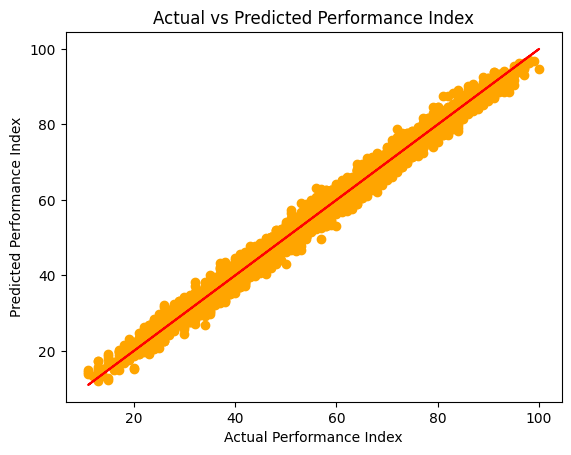

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/Student_Final.csv')
dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}, inplace=True)
X = dataset[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Sample_Question_Papers_Practiced']].values
y = dataset['Performance_Index'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred, color='orange')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()


New Predicted Value

In [ ]:
print("Predicted Values:")
print(y_pred)

Predicted Values:
[50.76413596 53.40822561 78.59712726 ... 80.50376466 58.93338445
 51.35648067]


R^2 and Adjusted R^2

In [ ]:
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R2: {r2}")
print(f"Adjusted R2: {adjusted_r2}")

R2: 0.9885510804186143
Adjusted R2: 0.988537181881945


Identify and Remove the Less Contributing Feature

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

dataset = pd.read_csv('/content/Student_Final.csv')
dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}, inplace=True)
model = smf.ols('Performance_Index ~ Hours_Studied + Previous_Scores + Sleep_Hours + Sample_Question_Papers_Practiced', data=dataset).fit()
highest_f_score_feature = anova_table['F'].idxmax()
print(f"Removing feature with highest F-score: {highest_f_score_feature}")
X_new = dataset.drop(columns=[highest_f_score_feature, 'Performance_Index']).values
y = dataset['Performance_Index'].values
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.33, random_state=0)
regressor_new = LinearRegression()
regressor_new.fit(X_train_new, y_train_new)
y_pred_new = regressor_new.predict(X_test_new)

Removing feature with highest F-score: Previous_Scores


In [ ]:
r2_new = r2_score(y_test_new, y_pred_new)
adjusted_r2_new = 1 - (1 - r2_new) * (n - 1) / (n - (p - 1) - 1)

print(f"New R2: {r2_new}")
print(f"New Adjusted R2: {adjusted_r2_new}")


New R2: 0.1314574645863763
New Adjusted R2: 0.1306669222301139


Comparing Both Models


In [ ]:
print("Original Model R2:", r2)
print("Original Model Adjusted R2:", adjusted_r2)
print("New Model R2:", r2_new)
print("New Model Adjusted R2:", adjusted_r2_new)

if adjusted_r2_new > adjusted_r2:
    print("The new model without the less significant feature is better.")
else:
    print("The original model is better.")


Original Model R2: 0.9885510804186143
Original Model Adjusted R2: 0.988537181881945
New Model R2: 0.1314574645863763
New Model Adjusted R2: 0.1306669222301139
The original model is better.


Comparing Both Models
using ANOVA Table

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}, inplace=True)
model = smf.ols('Performance_Index ~ Hours_Studied + Previous_Scores + Sleep_Hours + Sample_Question_Papers_Practiced', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
least_significant_feature = model.pvalues.idxmax()
print(f"Removing least significant feature: {least_significant_feature}")
new_model = smf.ols(f'Performance_Index ~ {" + ".join([col for col in dataset.columns if col not in [least_significant_feature, "Performance_Index"]])}', data=dataset).fit()
anova_table_new = sm.stats.anova_lm(new_model, typ=2)
print("New ANOVA Table:")
print(anova_table_new)
print("\nComparing ANOVA Tables:")
print("Original ANOVA Table:")
print(anova_table)
print("\nNew ANOVA Table:")
print(anova_table_new)
p_values = model.pvalues
p_values_new = new_model.pvalues
print("\nComparing P-Values:")
print("Original Model P-Values:")
print(p_values)
print("\nNew Model P-Values:")
print(p_values_new)
better_model_based_on_anova = "new" if anova_table_new['PR(>F)'].max() < anova_table['PR(>F)'].max() else "original"
print(f"\nThe {better_model_based_on_anova} model is better based on ANOVA table values.")

Removing least significant feature: Sample_Question_Papers_Practiced
New ANOVA Table:
                       sum_sq      df              F         PR(>F)
Hours_Studied    5.471994e+05     1.0  119996.876227   0.000000e+00
Previous_Scores  3.121377e+06     1.0  684495.475811   0.000000e+00
Sleep_Hours      6.559933e+03     1.0    1438.546063  3.200688e-294
Residual         4.558290e+04  9996.0            NaN            NaN

Comparing ANOVA Tables:
Original ANOVA Table:
                                        sum_sq      df              F  \
Hours_Studied                     5.455784e+05     1.0  128452.991807   
Previous_Scores                   3.119575e+06     1.0  734484.372302   
Sleep_Hours                       6.524340e+03     1.0    1536.114904   
Sample_Question_Papers_Practiced  3.131134e+03     1.0     737.205838   
Residual                          4.245176e+04  9995.0            NaN   

                                         PR(>F)  
Hours_Studied                      0.0